In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen= max_len)

print(len(pad_X_train[0]))

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

(25000,) (25000,)
(25000,) (25000,)
350


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 390,305
Trainable params: 390,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(pad_X_train, y_train,
                    batch_size = 32, epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 95s 141ms/step - loss: 0.4177 - acc: 0.8035 - val_loss: 0.3167 - val_acc: 0.8758
Epoch 2/10
625/625 [==============================] - 40s 63ms/step - loss: 0.2529 - acc: 0.9061 - val_loss: 0.3463 - val_acc: 0.8584
Epoch 3/10
625/625 [==============================] - 28s 44ms/step - loss: 0.1921 - acc: 0.9296 - val_loss: 0.3568 - val_acc: 0.8740
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 0.1366 - acc: 0.9524 - val_loss: 0.4326 - val_acc: 0.8650
Epoch 5/10
625/625 [==============================] - 25s 41ms/step - loss: 0.0986 - acc: 0.9671 - val_loss: 0.4721 - val_acc: 0.8510
Epoch 6/10
625/625 [==============================] - 24s 39ms/step - loss: 0.0697 - acc: 0.9770 - val_loss: 0.5370 - val_acc: 0.8498
Epoch 7/10
625/625 [==============================] - 23s 38ms/step - loss: 0.0530 - acc: 0.9836 - val_loss: 0.5718 - val_acc: 0.8538
Epoch 8/10
625/625 [==============================] - 23s 37m

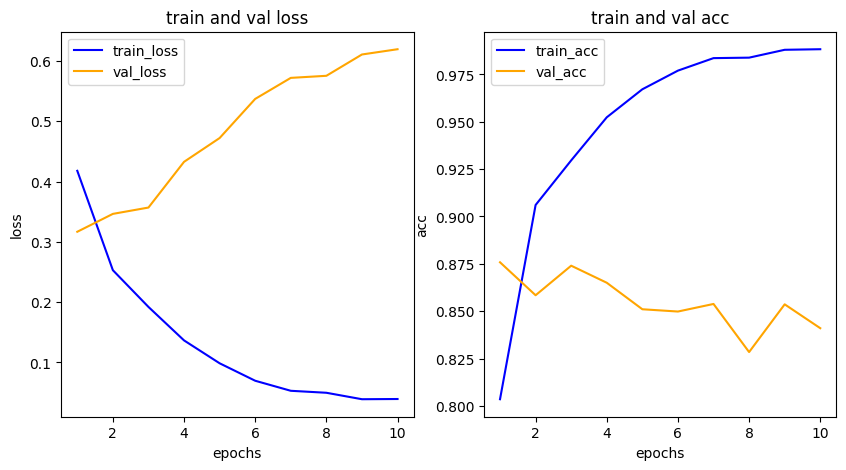

In [6]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

2110848/2110848 [==============================] - 1s 1us/step
(8982,) (8982,)
(2246,) (2246,)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen= max_len)

print(len(pad_X_train[0]))

500


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(pad_X_train, y_train,
                    batch_size = 32, epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
225/225 [==============================] - 55s 230ms/step - loss: 2.5373 - acc: 0.3514 - val_loss: 2.3392 - val_acc: 0.3450
Epoch 2/10
225/225 [==============================] - 38s 167ms/step - loss: 2.1223 - acc: 0.4753 - val_loss: 2.0034 - val_acc: 0.5092
Epoch 3/10
225/225 [==============================] - 33s 146ms/step - loss: 1.9134 - acc: 0.5228 - val_loss: 2.1286 - val_acc: 0.4413
Epoch 4/10
225/225 [==============================] - 19s 85ms/step - loss: 1.7327 - acc: 0.5578 - val_loss: 1.6712 - val_acc: 0.5698
Epoch 5/10
225/225 [==============================] - 19s 83ms/step - loss: 1.7169 - acc: 0.5598 - val_loss: 1.7461 - val_acc: 0.5359
Epoch 6/10
225/225 [==============================] - 15s 67ms/step - loss: 1.6576 - acc: 0.5768 - val_loss: 1.6487 - val_acc: 0.5821
Epoch 7/10
225/225 [==============================] - 15s 69ms/step - loss: 1.5730 - acc: 0.5965 - val_loss: 1.6270 - val_acc: 0.5860
Epoch 8/10
225/225 [==============================] - 14s 6

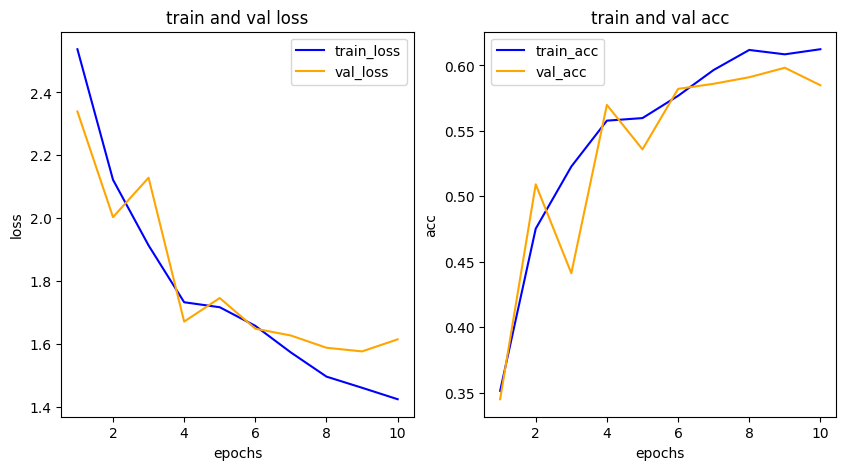

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()